In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

2025-03-19 12:39:39.763902: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-19 12:39:39.772770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742368179.782956   16918 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742368179.786145   16918 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742368179.793929   16918 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

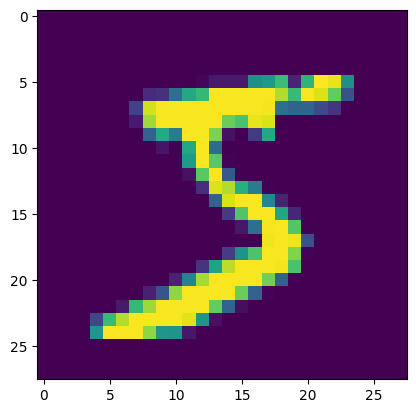

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [6]:
X_train=X_train/255
X_test=X_test/255


In [7]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

/home/appsmartz/miniconda3/envs/rpa/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-03-19 12:46:51.172711: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss="sparse_categorical_crossentropy",metrics=['accuracy'],optimizer='Adam')

In [12]:
history=model.fit(X_train,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.9971 - loss: 0.0117 - val_accuracy: 0.9761 - val_loss: 0.0920
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9972 - loss: 0.0105 - val_accuracy: 0.9758 - val_loss: 0.1053
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.9974 - loss: 0.0088 - val_accuracy: 0.9779 - val_loss: 0.0917
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9980 - loss: 0.0072 - val_accuracy: 0.9758 - val_loss: 0.1068
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9986 - loss: 0.0060 - val_accuracy: 0.9748 - val_loss: 0.1153
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9982 - loss: 0.0064 - val_accuracy: 0.9764 - val_loss: 0.1082
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9742 - val_loss: 0.1237
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.9986 - loss: 0.0

In [16]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


In [17]:
y_pred=y_prob.argmax(axis=1)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.976

In [21]:
history.history

{'accuracy': [0.9961458444595337,
  0.9962916374206543,
  0.996833324432373,
  0.9974583387374878,
  0.9976041913032532,
  0.9978749752044678,
  0.9984583258628845,
  0.9980833530426025,
  0.9983958601951599,
  0.9983958601951599],
 'loss': [0.01290636695921421,
  0.012651289813220501,
  0.01037200354039669,
  0.008424145169556141,
  0.008635398931801319,
  0.007255109027028084,
  0.00555143179371953,
  0.006384451407939196,
  0.005391635932028294,
  0.006001089699566364],
 'val_accuracy': [0.9760833382606506,
  0.9757500290870667,
  0.9779166579246521,
  0.9758333563804626,
  0.9748333096504211,
  0.9764166474342346,
  0.9741666913032532,
  0.9753333330154419,
  0.9744166731834412,
  0.9762499928474426],
 'val_loss': [0.0919809341430664,
  0.10528507828712463,
  0.09168201684951782,
  0.10683323442935944,
  0.11526363343000412,
  0.10815314948558807,
  0.12369520962238312,
  0.12528303265571594,
  0.12494932860136032,
  0.1301538050174713]}

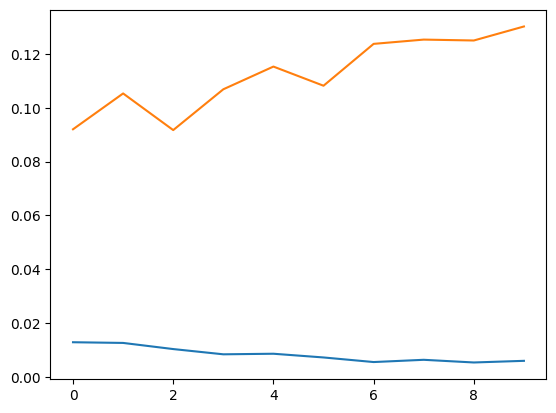

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])